# K-Means Implementation
### By: Andrew Angulo

---

## Imports

In this section, we import the necessary libraries for our analysis:

- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib.pyplot` for plotting

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading & Displaying Data

we load the Apple Vision Pro Twitter reviews dataset and display its contents.




In [120]:
apple_vision_pro_reviews = pd.read_csv("apple_vision_pro_twitter.csv")
apple_vision_pro_reviews

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt
0,1769458624638619691,"Mordecai I can't sell nft for 10 dollars, how ...",https://twitter.com/harndefty/status/176945862...,tweet,Harndefty 🐔🍗,@harndefty,0,0,0,0,26,0,2024-03-17 13:19:45
1,1769456825731346925,Here’s one recent example I found https://t.co...,https://twitter.com/leighdunsford/status/17694...,tweet,Leigh,@leighdunsford,0,0,0,0,6,0,2024-03-17 13:12:36
2,1769454738704302260,Never miss your Apple Vision Pro wherever you ...,https://twitter.com/Techlistics/status/1769454...,tweet,Techlistics,@Techlistics,0,0,0,1,52,0,2024-03-17 13:04:19
3,1769438420114317638,L'Apple Vision Pro n'est pas encore disponible...,https://twitter.com/Deals_Store_Fr/status/1769...,tweet,Deals_Store 🇫🇷,@Deals_Store_Fr,0,0,0,1,281,0,2024-03-17 11:59:28
4,1769434792159039744,مقارنة بين نظارتي Apple Vision Pro و Meta Ques...,https://twitter.com/aitnews/status/17694347921...,tweet,البوابة العربية للأخبار التقنية AITnews,@aitnews,0,0,0,0,342,0,2024-03-17 11:45:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10140,1768736930135523673,Dive into the Stream 🎬 Immerse yourself in ent...,https://twitter.com/AiTechInnovate/status/1768...,tweet,Tech Innovate,@AiTechInnovate,0,0,0,2,60,0,2024-03-15 13:32:00
10141,1768728245313372509,What a privilege! I am grateful to have been s...,https://twitter.com/VanezuV/status/17687282453...,tweet,Vanezuva,@VanezuV,2,2,5,14,566,1,2024-03-15 12:57:29
10142,1768727499817529730,Los Apple Vision Pro no están exentos de riesg...,https://twitter.com/Tecnodiva/status/176872749...,tweet,Tecnodiva,@Tecnodiva,0,0,0,1,28,0,2024-03-15 12:54:31
10143,1768721610213560669,"Thanks for making #HIMSS24 so special! Today, ...",https://twitter.com/Visage_Imaging/status/1768...,tweet,Visage Imaging,@Visage_Imaging,0,1,2,6,197,0,2024-03-15 12:31:07


# Data Preparation for Clustering

We prepare the dataset for clustering analysis. The goal is to get relevant information from a dataset of Apple Vision Pro Twitter reviews and normalize the data to ensure that each feature contributes equally to the clustering algorithm.


### The follow steps we take are:
1. Loading the Dataset
2. Feature Selection
3. Handling Missing Values
4. Extracting Data for Clustering
5. Data Normalization

In [121]:
apple_vision_pro_reviews = pd.read_csv("apple_vision_pro_twitter.csv")
features = ['replyCount', 'quoteCount', 'retweetCount', 'likeCount', 'views', 'bookmarkCount']
apple_vision_pro_reviews = apple_vision_pro_reviews.dropna(subset=features)
data = apple_vision_pro_reviews[features].copy()


data_normalized = (data - data.min()) / (data.max() - data.min())

### Displaying the First Few Rows of the Normalized Data



In [122]:
data_normalized.head()

,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount
0,0.0,0.0,0.0,0.000000,0.000010,0.0
1,0.0,0.0,0.0,0.000000,0.000002,0.0
2,0.0,0.0,0.0,0.000048,0.000021,0.0
3,0.0,0.0,0.0,0.000048,0.000117,0.0
4,0.0,0.0,0.0,0.000000,0.000142,0.0


# Initializing K-Means Clustering

We begin by determining the number of clusters, denoted by `K`. For this, we set `K = 3`, saying that the data will be grouped into three clusters.

Next, we move on to the step of initializing the centroids. These centroids are essentially the starting points for the clustering algorithm and will guide how the data points are grouped. To initialize the centroids, we randomly select `K` data points from our normalized dataset. This randomness is controlled by setting `random_state=42`, which tells us that the selection process can be replicated, providing consistency across different executions.

This initialization step is essential because the position of these initial centroids can significantly impact the final clusters formed by the algorithm.

In [123]:
# Set the number of clusters
K = 3

# Randomly initialize centroids by sampling K data points
centroids = data_normalized.sample(n=K, random_state=42).reset_index(drop=True)

# Clustering Functions for K-Means

To get started with K-Means, we define three key functions: `assign_clusters`, `calculate_mse`, and `update_centroids`.

The first function, `assign_clusters`, is responsible for associating each data point with the nearest centroid. It computes the distance between each data point and each centroid using Euclidean distance. The result is a set of cluster labels that indicate which centroid (or cluster) each data point belongs to, along with the computed distances.

Next, the `calculate_mse` function takes these distances and computes the mean squared error (MSE). This metric quantifies how well the data points fit within their assigned clusters. Specifically, it calculates the squared distance between each data point and its assigned centroid, then averages these squared distances to obtain the MSE. The lower the MSE, the better the clustering.

Finally, `update_centroids` recalculates the centroids based on the current cluster assignments. For each cluster, it determines the new centroid as the mean position of all data points assigned to that cluster. This step is crucial in the iterative process of K-Means, as it gradually refines the positions of the centroids to better fit the data.

Together, these functions form the backbone of the K-Means clustering process, enabling iterative refinement of clusters until the centroids stabilize, and the MSE converges.


In [124]:
# Function: assign_clusters
# This function assigns each data point to the closest center.
#
# Parameters:
#   data: 
#       - A 2D array where each row represents a data point and each column represents a feature.
#   centroids: 
#       - A 2D array where each row represents a centroid's position in the feature space.
#
# Returns:
#   tuple:
#       - cluster_labels: 
#           An array where each element is the index of the closest centroid for the corresponding data point.
#       - distances: 
#           A 2D array containing the distances from each data point to each centroid.
def assign_clusters(data, centroids):
    # Calculate the distance between each data point and each centroid
    distances = np.sqrt(((data[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
    # Find the index of the closest centroid for each data point
    cluster_labels = np.argmin(distances, axis=1)
    # Return the cluster assignments and the distances
    return cluster_labels, distances


# Function: calculate_mse
# This function calculates the Mean Squared Error for the current clustering.
#
# Parameters:
#   distances: 
#       - A 2D array where each element represents the distance from a data point to a centroid.
#   cluster_labels: 
#       - An array where each element is the index of the centroid assigned to the corresponding data point.
#
# Returns:
#   float:
#       - mse: The average of the squared distances of data points to their assigned centroids.
def calculate_mse(distances, cluster_labels):
    # Get the distance of each data point to its assigned centroid
    assigned_distances = distances[np.arange(distances.shape[0]), cluster_labels]
    # Calculate the average of the squared distances
    mse = np.mean(assigned_distances ** 2)
    # Return the MSE value
    return mse


# Function: update_centroids
# This function updates the positions of the centroids based on the current cluster assignments.
#
# Parameters:
#   data: 
#       - A 2D array where each row represents a data point and each column represents a feature.
#   cluster_labels: 
#       - An array where each element is the index of the centroid assigned to the corresponding data point.
#   K (int): 
#       - The number of clusters.
#
# Returns:
#   numpy array:
#       - new_centroids: A 2D array containing the updated positions of the centroids.
def update_centroids(data, cluster_labels, K):
    # For each cluster, calculate the average position of all points in that cluster
    new_centroids = np.array([data[cluster_labels == k].mean(axis=0) for k in range(K)])
    # Return the new centroids
    return new_centroids


# Running the K-Means Algorithm

We finally run the K-Means algorithm, which groups data points into clusters, until it either finishes or reaches the maximum number of tries.

First, we convert the initial centroids into a array, called `centroids_array`, to make the calculation much much easier. We set the algorithm to run up to 100 times, which we control with the `max_iterations` variable. We also create a list called `mse_list` to keep track of how well the algorithm is doing during each try.

The loop then runs through the main steps of K-Means:

1. **Assigning Data Points**: For each loop, we assign each data point to the closest centroid using the `assign_clusters` function. This step updates which cluster each data point belongs to.
  
2. **Calculating Error**: The `calculate_mse` function checks how close the data points are to their centroids, and this error is added to `mse_list` to see how it changes over time.

3. **Updating Centroids**: The centroids are recalculated based on the current cluster assignments with the `update_centroids` function. This step adjusts the centroids to better match the data points.

After updating, we check if the centroids have changed much compared to the previous round. If they haven’t changed much, the loop stops early, and a message saying it has finished is printed. If the centroids are still changing after 100 tries, the loop stops, and a message says the maximum tries were reached without finishing.

This process helps the clusters become clearer with each loop until the centroids settle in place and stop moving.


In [125]:
# Convert centroids to a numpy array
centroids_array = centroids.values
max_iterations = 100
mse_list = []

for i in range(max_iterations):
    cluster_labels, distances = assign_clusters(data_normalized.values, centroids_array)
    mse = calculate_mse(distances, cluster_labels)
    mse_list.append(mse)
    new_centroids_array = update_centroids(data_normalized.values, cluster_labels, K)
    
    # Check for convergence 
    if np.allclose(centroids_array, new_centroids_array, atol=1e-6):
        print(f"Converged after {i+1} iterations")
        break
    
    # Updating the centroids
    centroids_array = new_centroids_array
else:
    print(f"Reached maximum iterations ({max_iterations}) without convergence.")


Converged after 19 iterations


# Plotting MSE Over Iterations

Now we generate a plot to visualize the Mean Squared Error (MSE) over each iteration of the K-Means algorithm. The plot helps track how the error decreases as the algorithm progresses, indicating improvements in clustering.


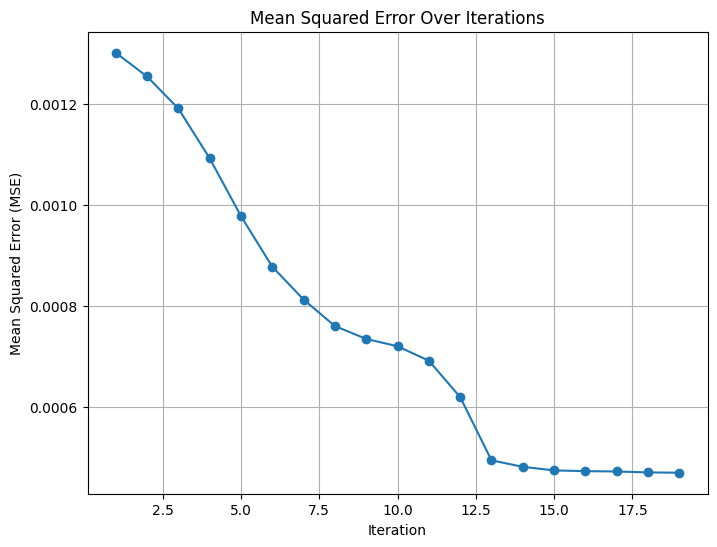

In [126]:
# Plot MSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o')
plt.title('Mean Squared Error Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Defining Feature Pairs for Plotting

These pairs will help visualize the relationships between different engagement metrics.


In [127]:
# List of feature pairs to plot
feature_pairs = [
    ('likeCount', 'retweetCount'),
    ('replyCount', 'quoteCount'),
    ('views', 'bookmarkCount')
]

# Converting Data to DataFrames

Here we convert the normalized data and centroids into DataFrames, which makes it easier to handle and work with the data.


In [128]:
# Convert data and centroids to DataFrames for easier handling
data_normalized_df = pd.DataFrame(data_normalized, columns=features)
centroids_df = pd.DataFrame(centroids_array, columns=features)

# Setting Up Cluster Colors and Labels

Here were labelling the points within the grab with specific colors and labels for each cluster, which will be used in visualizations to distinguish between the different clusters.


In [129]:
# Define cluster colors and labels
cluster_colors = ['blue', 'green', 'orange']
cluster_labels_list = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Visualizing Clusters for Feature Pairs

This loop creates scatter plots for each pair of selected features, showing how data points are grouped into clusters. Each cluster is colored differently, and the centroids are marked with red 'X's. The centroids are also annotated with their cluster numbers for clarity.


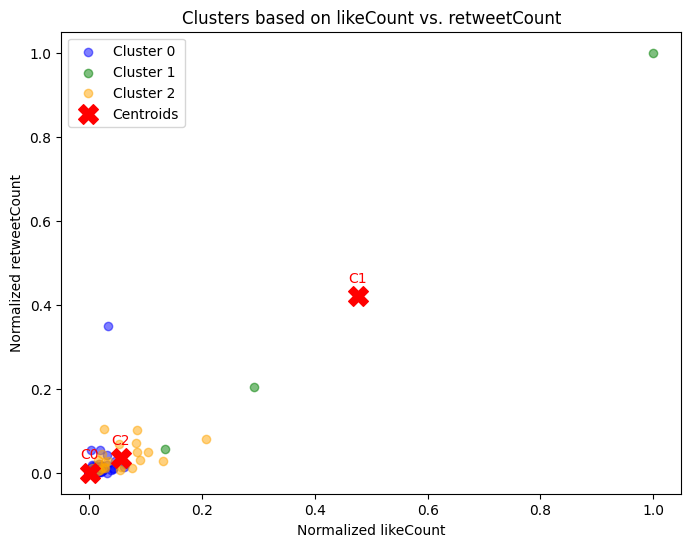

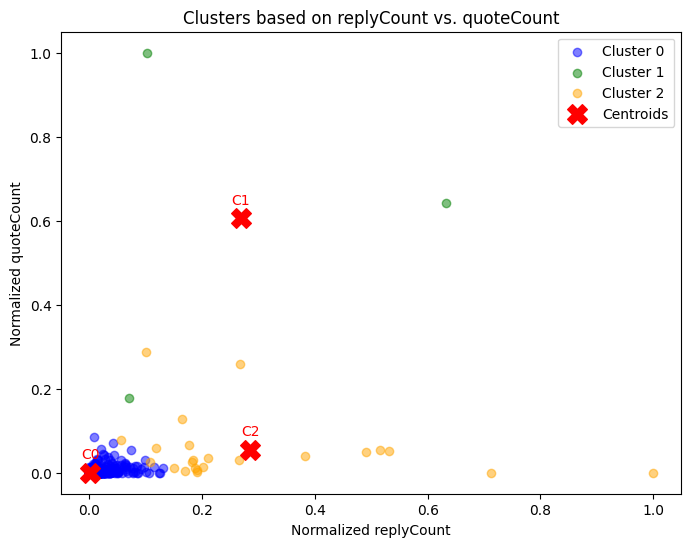

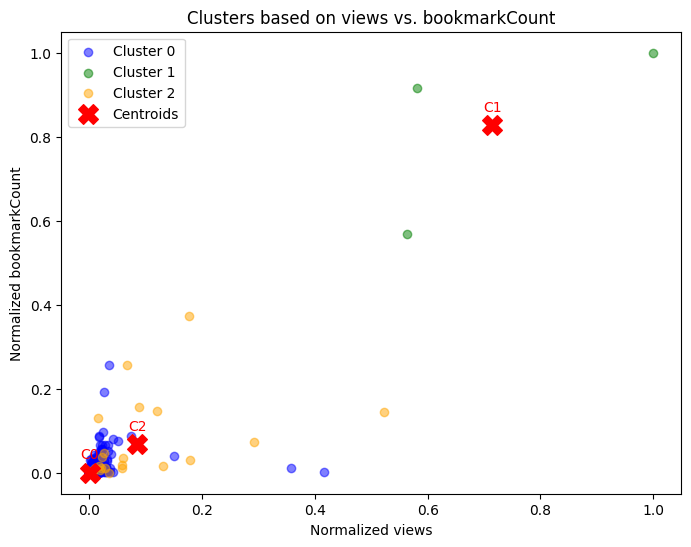

In [130]:
for feature_x, feature_y in feature_pairs:
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    for cluster in range(K):
        idx = cluster_labels == cluster
        plt.scatter(
            data_normalized_df.loc[idx, feature_x],
            data_normalized_df.loc[idx, feature_y],
            color=cluster_colors[cluster],
            marker='o',
            alpha=0.5,
            label=f'Cluster {cluster}'
        )
    
    # Plot centroids
    plt.scatter(
        centroids_df[feature_x],
        centroids_df[feature_y],
        c='red',
        marker='X',
        s=200,
        label='Centroids'
    )
    # Labelling the centroids with cluster numbers
    for i, (x, y) in enumerate(zip(centroids_df[feature_x], centroids_df[feature_y])):
        plt.annotate(f'C{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='red')
    
    plt.title(f'Clusters based on {feature_x} vs. {feature_y}')
    plt.xlabel(f'Normalized {feature_x}')
    plt.ylabel(f'Normalized {feature_y}')
    plt.legend()
    plt.show()

# Adding Cluster Labels and Calculating Cluster Means

This adds the cluster labels to the original data, then it calculates the mean values for each features within each cluster.


In [131]:
# Add cluster labels to the original data
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Calculate mean values for each cluster
cluster_means = data_with_clusters.groupby('Cluster').mean()
print("Cluster Means:")
cluster_means

Cluster Means:


,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount
Cluster,,,,,,
0,0.860955,0.161775,1.509734,8.020457,1.403573e+03,0.630596
1,142.000000,250.000000,2443.000000,9984.666667,1.718460e+06,1018.000000
2,150.695652,22.695652,206.478261,1165.217391,2.040420e+05,82.608696
